In [1]:
import mne
import numpy as np

In [2]:
sbj='002'
rec='07'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=120, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S002/S002R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


onset = 
duration = 
desciption = 
my_ann = mne.Annotations(onset, duration, description)

In [3]:
onset = []
duration = []
description = []

for i in range(len(events)-1):
    if events[i, 2] == 1:
        continue
    elif events[i, 2] == 2:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T1')
        continue
    elif events[i, 2] == 3:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T2')
        continue

0
1312
2624
3936
5248
6560
7872
9184
10496
11808
13120
14432
15744
17056


In [4]:
print(onset)
print(np.array(onset)/160)
print(np.array(duration)/160)

[0, 1312, 2624, 3936, 5248, 6560, 7872, 9184, 10496, 11808, 13120, 14432, 15744, 17056]
[  0.    8.2  16.4  24.6  32.8  41.   49.2  57.4  65.6  73.8  82.   90.2
  98.4 106.6]
[8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2]


In [5]:
onset = np.array(onset)/160
duration = np.array(duration)/160
my_ann = mne.Annotations(onset, duration, description)
print(my_ann)

<Annotations | 14 segments: T1 (7), T2 (7)>


In [6]:
Data.set_annotations(my_ann)

<RawEDF | S002R07.edf, 64 x 19680 (123.0 s), ~130 kB, data not loaded>

In [7]:
events, event_id=mne.events_from_annotations(Data)

epochs=mne.Epochs(Data, events, event_id=event_id,  baseline=(None,None))

Used Annotations descriptions: ['T1', 'T2']
14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [8]:
T1=epochs['T1'].get_data()
T2=epochs['T2'].get_data()

Loading data for 7 events and 113 original time points ...
0 bad epochs dropped
Loading data for 7 events and 113 original time points ...
1 bad epochs dropped


In [9]:
T1

array([[[-4.80530973e-06, -1.08053097e-05,  3.19469027e-06, ...,
          1.71946903e-05,  1.01946903e-05,  3.41946903e-05],
        [ 4.60176991e-07, -1.75398230e-05, -3.53982301e-06, ...,
          2.54601770e-05,  1.64601770e-05,  3.64601770e-05],
        [ 1.06194690e-06, -1.79380531e-05, -7.93805310e-06, ...,
          2.70619469e-05,  1.60619469e-05,  4.20619469e-05],
        ...,
        [-2.30265487e-05, -3.02654867e-06, -2.70265487e-05, ...,
         -2.65486726e-08,  1.99734513e-05, -3.02654867e-06],
        [-2.55486726e-05,  1.45132743e-06, -1.45486726e-05, ...,
          1.14513274e-05,  2.14513274e-05, -2.54867257e-06],
        [-2.31769912e-05, -2.17699115e-06, -2.61769912e-05, ...,
         -1.17699115e-06,  2.08230088e-05, -4.17699115e-06]],

       [[-1.61061947e-06,  1.93893805e-05,  1.38938053e-06, ...,
          3.73893805e-05,  2.63893805e-05,  2.13893805e-05],
        [-4.66371681e-06,  1.53362832e-05, -4.66371681e-06, ...,
          2.73362832e-05,  1.73362832e

In [10]:
montage = mne.channels.make_standard_montage('standard_1020')

In [11]:
print(montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


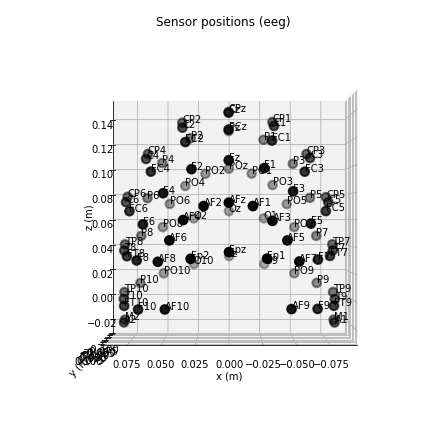

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


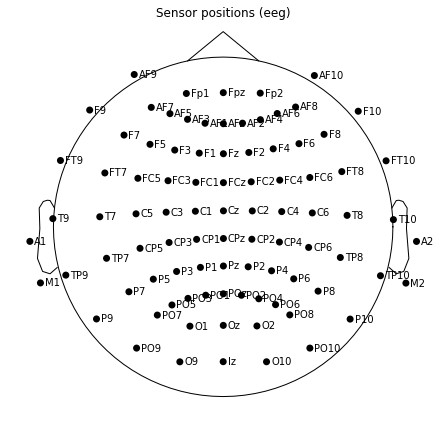

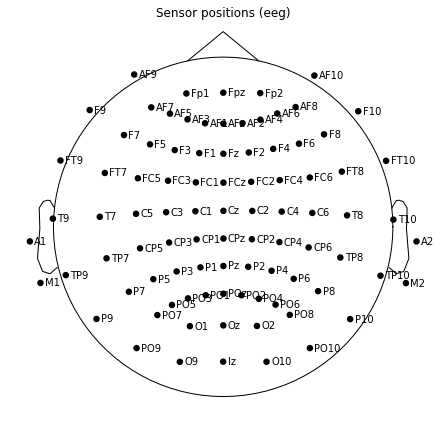

In [12]:
fig = montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
montage.plot(kind='topomap', show_names=True)

In [13]:
Data.rename_channels(lambda x: x.strip('.'))

<RawEDF | S002R07.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [14]:
ch_map = {'Fc5': 'FC5',
          'Fc3': 'FC3',
          'Fc1': 'FC1',
          'Fcz': 'FCz',
          'Fc2': 'FC2',
          'Fc4': 'FC4',
          'Fc6': 'FC6',
          'Cp5': 'CP5',
          'Cp3': 'CP3',
          'Cp1': 'CP1',
          'Cpz': 'CPz',
          'Cp2': 'CP2',
          'Cp4': 'CP4',
          'Cp6': 'CP6',
          'Af7': 'AF7',
          'Af3': 'AF3',
          'Afz': 'AFz',
          'Af4': 'AF4',
          'Af8': 'AF8',
          'Ft7': 'FT7',
          'Ft8': 'FT8',
          'Tp7': 'TP7',
          'Tp8': 'TP8',
          'Po7': 'PO7',
          'Po3': 'PO3',
          'Poz': 'POz',
          'Po4': 'PO4',
          'Po8': 'PO8'}

In [15]:
Data.rename_channels(ch_map)

<RawEDF | S002R07.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [16]:
Data.set_montage(montage)

<RawEDF | S002R07.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

In [17]:
import matplotlib.pyplot as plt

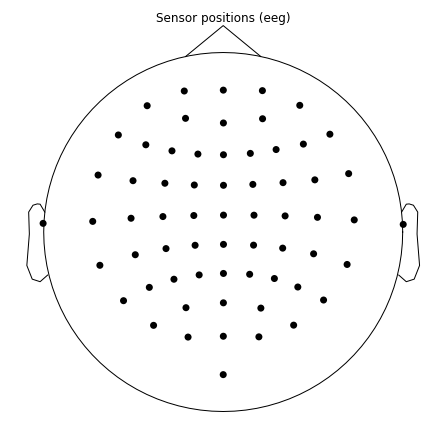

In [18]:
#fig = plt.figure()
Data.plot_sensors(ch_type='eeg');

Data.plot_sensors('3d')

In [19]:
epochs_params = dict(events=events, event_id=event_id, tmin=0, tmax=120)

In [20]:
eeg_ref=mne.Epochs(Data, **epochs_params, baseline=(None, None)).average()

14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


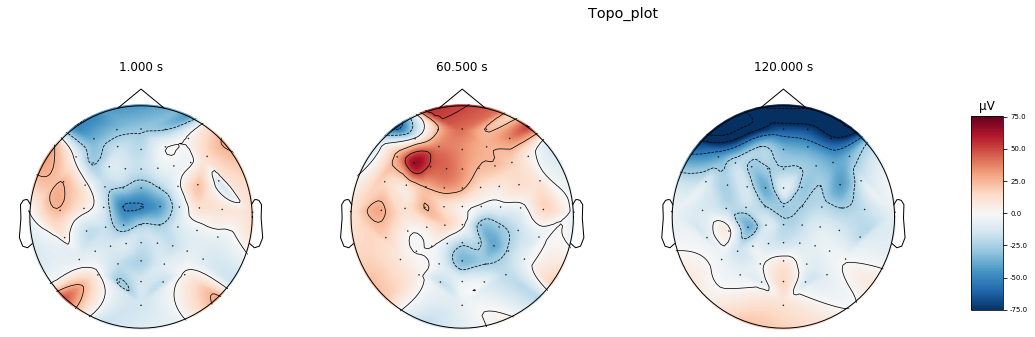

In [21]:
eeg_ref.plot_topomap(times=np.linspace(1,120,3), size=3., title='Topo_plot', time_unit='s');

In [22]:
epochs

<Epochs  |   14 events (good & bad), -0.2 - 0.5 sec, baseline [None, None], ~130 kB, data not loaded,
 'T1': 7
 'T2': 7>

In [23]:
T1=epochs['T1']
T2=epochs['T2']

In [24]:
T1

<Epochs  |   7 events (good & bad), -0.2 - 0.5 sec, baseline [None, None], ~130 kB, data not loaded,
 'T1': 7>

In [25]:
Data

<RawEDF | S002R07.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

In [26]:
from mne.time_frequency import tfr_multitaper

Loading data for 14 events and 113 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)


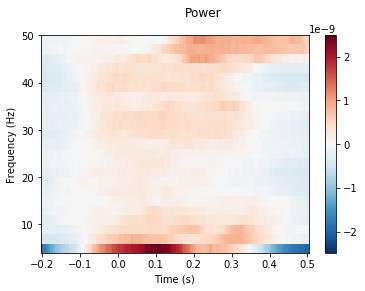

No baseline correction applied


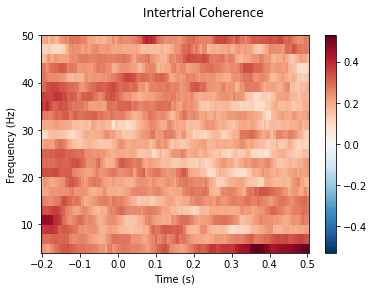

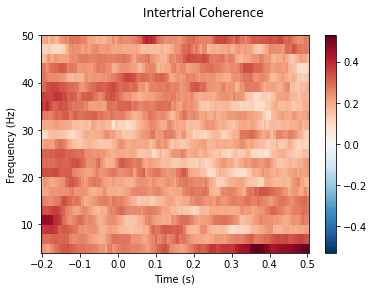

In [27]:
freqs = np.arange(5., 50., 2.)  # define frequencies of interest
n_cycles = freqs / 2.  # 0.5 second time windows for all frequencies

# Choose time x (full) bandwidth product
time_bandwidth = 4.0  # With 0.5 s time windows, this gives 8 Hz smoothing

power, itc =tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles,
                            use_fft=True, time_bandwidth=time_bandwidth,
                            return_itc=True, n_jobs=1)

# Plot results (with baseline correction only for power)
power.plot([0], baseline=(-0.5, 0), mode='mean', title='Power')
itc.plot([0], title='Intertrial Coherence')

Applying baseline correction (mode: logratio)


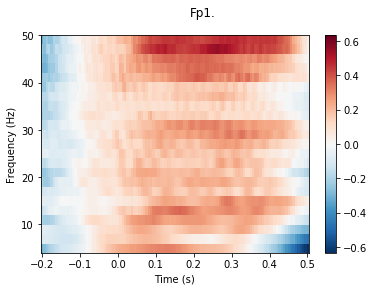

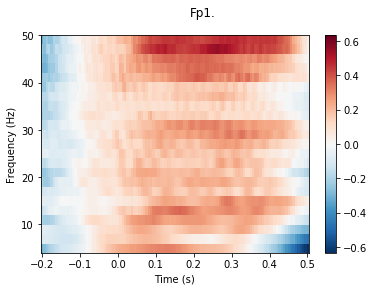

In [28]:
#power.plot_topo(picks='eeg',baseline=(-0.5, 0), mode='logratio', title='Average power')
channel =21
power.plot([channel], baseline=(-0.50, 0), mode='logratio', title=power.ch_names[channel])



No baseline correction applied


ValueError: Requested time point (1.3 s) exceeds the rangeof the data. Choose different `timefreqs`.

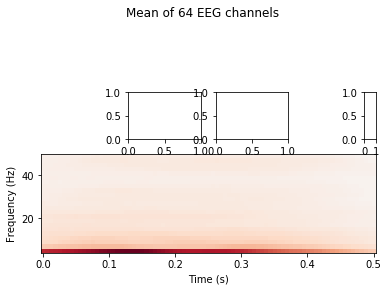

In [29]:
power.plot_joint(mode='mean', tmin=0, tmax=120,
                 timefreqs=[(.5, 10), (1.3, 8)])